# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("terrain.csv")

In [4]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [5]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

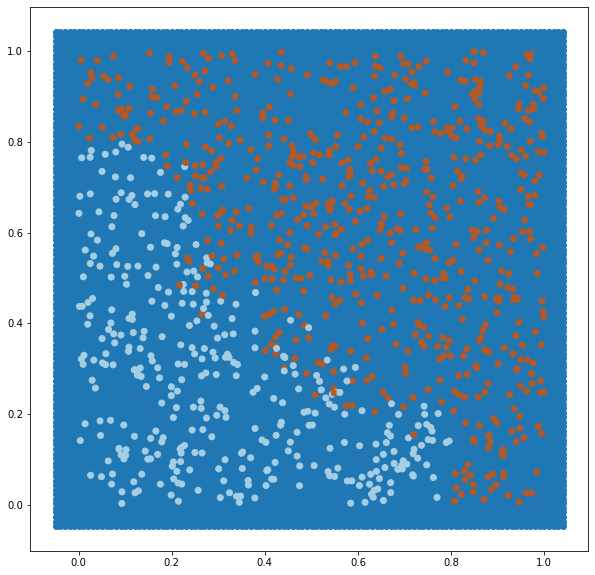

In [6]:
draw(None,X,y,0.01)

#### Regresión Logística

In [7]:
import sklearn

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()

In [10]:
clf.fit(X, y)

LogisticRegression()

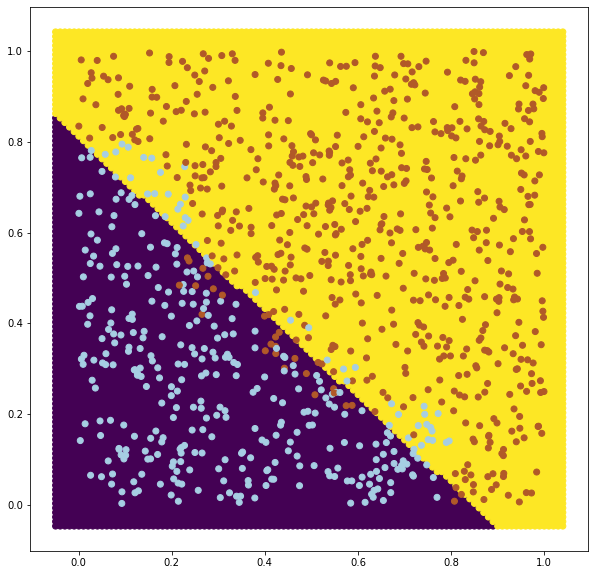

In [11]:
draw(clf, X, y, 0.01)

In [12]:
#Cross val score
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring="accuracy")

array([0.905, 0.93 , 0.945, 0.935, 0.93 ])

In [13]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

0.9289999999999999

#### K nearst neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Encontramos la mejor k
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
clf_gk = GridSearchCV(KNeighborsClassifier(),
                        param_grid={'n_neighbors':np.arange(1,100)},
                        scoring="accuracy")
#El rango debe ir de 1 a 100, no puede tener 0 vecinos
clf_gk.fit(X,y)
clf_gk.best_params_

{'n_neighbors': 16}

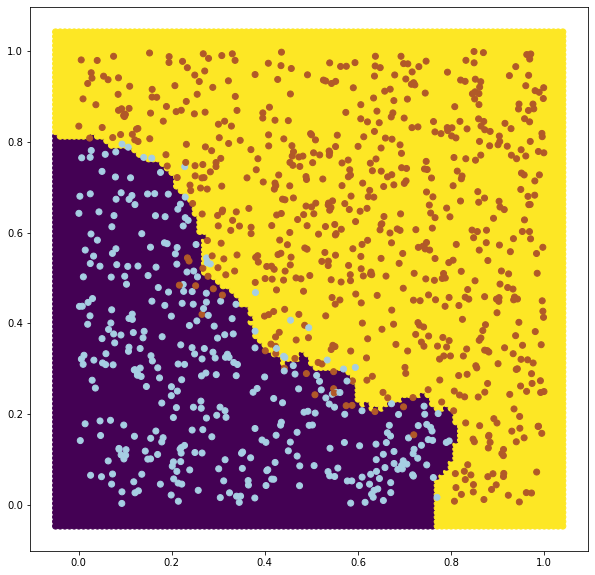

In [24]:
draw(clf_gk.best_estimator_, X, y, 0.01)

Vemos que abajo no hace un corte diagonal, la tendencia es horizontal. La forma de mejorarlo es tener más datos.

In [28]:
cross_val_score(clf_gk.best_estimator_, X, y, cv=5, scoring='accuracy').mean()

0.9570000000000001

### Testeo de los datos que estamos entrenando

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#test_size = tamaño del test (20%)

(array([73., 68., 93., 62., 93., 85., 93., 75., 77., 81.]),
 array([4.05939697e-04, 1.00356129e-01, 2.00306317e-01, 3.00256506e-01,
        4.00206695e-01, 5.00156884e-01, 6.00107073e-01, 7.00057262e-01,
        8.00007451e-01, 8.99957640e-01, 9.99907829e-01]),
 <a list of 10 Patch objects>)

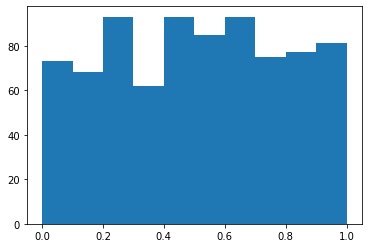

In [26]:
plt.hist(X_train[:,0])
#Todos los valores de boomp del entrenamiento

(array([19., 24., 22., 14., 13., 15., 19., 22., 26., 26.]),
 array([0.02038002, 0.11827026, 0.21616051, 0.31405075, 0.411941  ,
        0.50983124, 0.60772149, 0.70561173, 0.80350198, 0.90139222,
        0.99928247]),
 <a list of 10 Patch objects>)

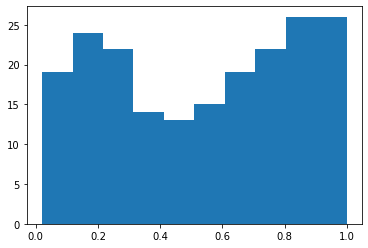

In [27]:
plt.hist(X_test[:,0])
##Todos los valores de boomp del test

## Metricas

#### Precision
Precision - Prediction
$$Precision=\frac{True Positive}{Actual Results} or \frac{True Positive}{True Positive + False Positive}$$
Fast -> $\frac{Pred Fast \cap Real Fast}{Pred Fast}$

#### Recall
Recall - Real
$$Recall=\frac{True Positive}{Predicted Results} or \frac{True Positive}{True Positive + False Positive}$$
Fast -> $\frac{Pred Fast \cap Pred Fast}{Real Fast}$
$$Precision=\frac{True Positive}{True Positive + False Positive}$$

#### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, classification_report


In [30]:
confusion_matrix(y_test, clf_gk.predict(X_test))

array([[ 70,   4],
       [  3, 123]], dtype=int64)

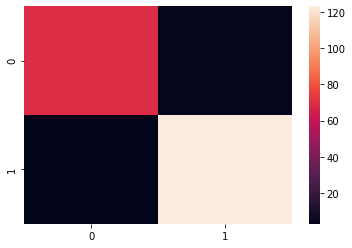

In [34]:
sns.heatmap(confusion_matrix(y_test, clf_gk.predict(X_test)));

In [35]:
print(classification_report(y_test, clf_gk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        74
         1.0       0.97      0.98      0.97       126

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



#### Custom metrics

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test,clf_gk.predict(X_test),labels=[1])

0.968503937007874

In [38]:
from sklearn.metrics import make_scorer

def prec_fast(y_test, pred):
    return sum(y_test[pred==1])/len(y_test[pred==1])

clf_gk = GridSearchCV(KNeighborsClassifier(),
                        param_grid={'n_neighbors':np.arange(1,100)},
                        scoring=make_scorer(prec_fast))

clf_gk.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring=make_scorer(prec_fast))

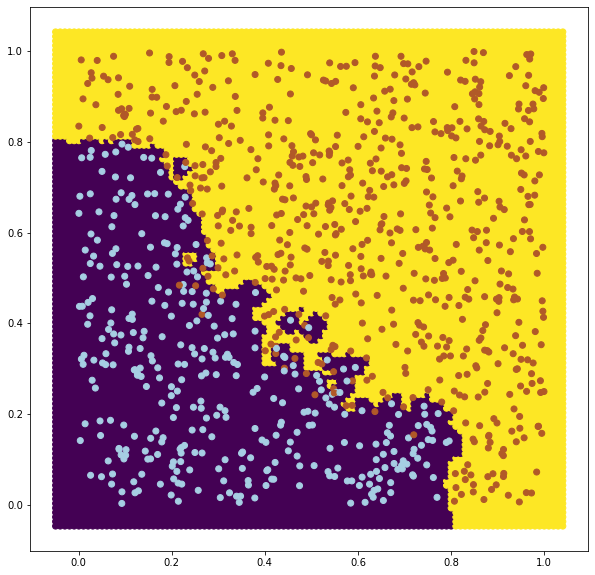

In [40]:
draw(clf_gk.best_estimator_, X, y, 0.01)

#### Support Vector Machine

Las Máquinas de Vector Soporte se fundamentan en el concepto de hiperplano. Este hiperplano es un plano de dimensiones $p-1$, donde $p$ es el número de variables independientes, que trata de separar el espacio p-dimensional en dos mitades, dejando a cada lado del mismo, una categoría diferente de los datos.

Dado que un espacio se puede dividir de múltiples formas, el hiperplano óptimo de separación (maximal margin hyperplane) es aquel que se encuentra lo más alejado de posible de las observaciones del conjunto de entrenamiento. Para obtener este hiperplano se calculan las distancias perpendiculares desde las observaciones más cercanas al plano de separación, estas distancias son denominadas vector soporte.

Existén casos que por la naturaleza de las observaciones, éstas no son perfectamente separables por un maximal margin hyperplane. En estos casos se busca un hiperplano que cometa el número mínimo de errores, conocido como support vector classifier - SVC.

Cuando los grupos no son separables de forma lineal en el espacio origen, una estrategia es aumentar las dimensiones del espacio para buscar un hiperplano que sí sea capaz de diferenciar los grupos. Los límites de separación lineales generados en el espacio aumentado se convierten en límites de separación no lineales al proyectarlos en el espacio original.

$$f(x_1, x_2) = (x_1, x_2, x_1^2x_2^2)$$
Es en estos casos, cuando se introducen dimensiones nuevas en los datos, que el support vector classifier - SVC, se pasa a denominar support vector machines - SVM.

Para aumentar y transformar las dimensiones de un espacio se pueden utlizar los kernel. Un kernel (K) es una función que devuelve el resultado del dot product entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. A continuación se listan los kernel más utilizados:

Kernel lineal:

Si se emplea un Kernel lineal, el clasificador support vector machine obtenido es equivalente al support vector classifier.

$$K(x, x') = x·x'$$
Kernel polinómico:

No suele ser recomendable emplear valores de $d$ mayores 5 por problemas de overfitting.

$$K(x, x') = (x·x'+c)^d$$
Kernel gaussiano (RBF):

El valor de $\gamma$ controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

$$K(x, x') = e^{-\gamma||x-x'||^2} $$
Principales parámetros del modelo:

C: parámetro que controla las violaciones del margen, cuanto más elevado, más permisivo. Permite controlar el equilibrio entre sesgo y varianza del modelo.
kernel:
* linear: linea de separación
* poly: linea polinomial de separación
* degree: grado del polinomio
* rbf: círculo de separción
* gamma: inverso del radio

In [41]:
from sklearn.svm import SVC

In [58]:
#Linear
clf_gsl = GridSearchCV(
    SVC(kernel='linear'),
    param_grid={"C": [.1, 1, 10, 100, 1000]},
    scoring='accuracy')

# Fit will test all of the combinations
clf_gsl.fit(X, y)

clf_gsl.best_params_


{'C': 100}

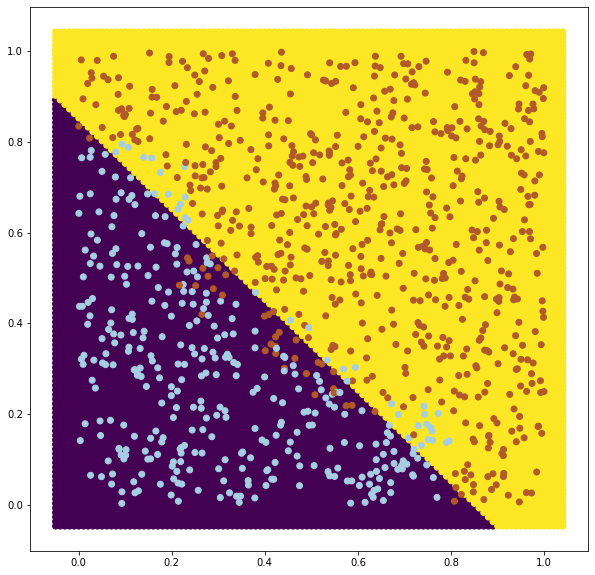

In [59]:
draw(clf_gsl, X, y, 0.01)

In [60]:
#Radial
clf_gsrbf = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid={"C": [.1, 1, 10, 100,1000],
               "gamma": [1, 10, 100]},
    scoring='accuracy')

# Fit will test all of the combinations
clf_gsrbf.fit(X, y)

clf_gsrbf.best_params_


{'C': 100, 'gamma': 10}

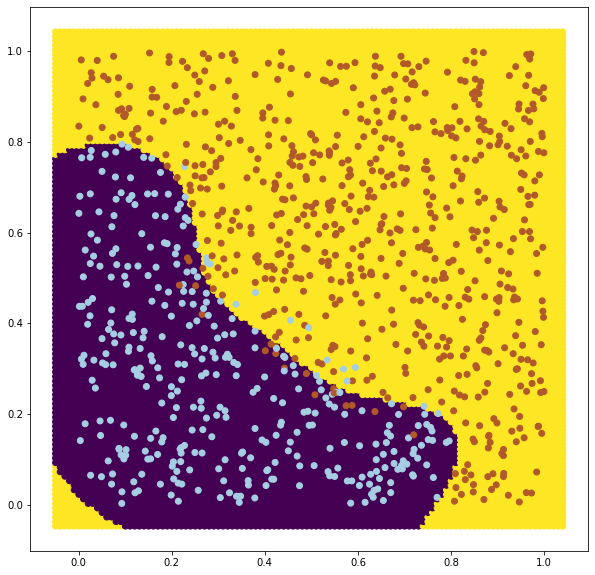

In [61]:
draw(clf_gsrbf, X, y, 0.01)

In [66]:
#Polinomial
clf_gspoly = GridSearchCV(
    SVC(kernel='poly'),
    param_grid={"C": [.1, 1, 10, 100, 1000],
               "degree": [2,3,4]},
    scoring='accuracy')

# Fit will test all of the combinations
clf_gspoly.fit(X, y)

clf_gspoly.best_params_

{'C': 1000, 'degree': 4}

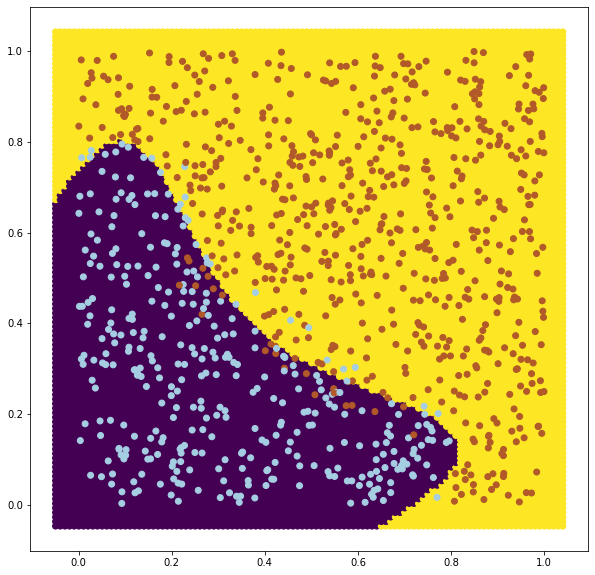

In [67]:
draw(clf_gspoly, X, y, 0.01)

In [69]:
#Valores para comparar
print(clf_gsl.best_score_)
print(clf_gsrbf.best_score_)
print(clf_gspoly.best_score_)

0.929
0.958
0.9530000000000001


#### Árbol de decisión

En el caso de utilizarse como algoritmo de clasificación, en lugar de utilizar el MSE (mean square error) para analizar las posibles divisiones, se utilizan otros indicadores como pueden ser:

Gini Index:

Es una medida de la varianza total en el conjunto de las $K$ clases del nodo $m$. Se considera una medida de pureza del nodo.

$$\begin{align}
G_m = \sum_{k = 1}^K \hat{p}_{mk}(1 - \hat{p}_{mk})
\end{align}$$
Cuando $\hat{p}_{mk}$ es cercano a 0 o a 1 (el nodo contiene mayoritariamente observaciones de una clase), el término $\hat{p}_{mk}(1 - \hat{p}_{mk})$ es muy pequeño. Como consecuencia, cuanto mayor sea la pureza del nodo, menor será el valor del índice Gini G.

El algoritmo CART (Classification and regression trees) emplea el Gini Index como criterio de división.

Information Gain - Cross Entropy:

La entropía es otra forma de cuantificar el desorden de un sistema. En el caso de los nodos, el desorden se corresponde con la impureza.

Si un nodo es puro, contiene únicamente observaciones de una clase, entonces su entropía es cero. Por el contrario, si la frecuencia de cada clase es la misma, el valor de la entropía alcanza el valor máximo de 1.

$$\begin{align}
D = - \sum_{k = 1}^K \hat{p}_{mk}log(\hat{p}_{mk})
\end{align}$$
Los algoritmos C4.5 y C5.0 emplean information gain como criterio de división.

Chi - Square ($\chi^2$):

Esta aproximación consiste en identificar si existe una diferencia significativa entre los nodos hijos y el nodo padre, es decir, si hay evidencias de que la división consigue una mejora efectiva. Para ello, se aplica un test estadístico chi-square goodness of fit empleando como distribución esperada $H_0$ la frecuencia de cada clase en el nodo parental. Cuanto mayor sea el estadístico $\chi^2$, mayor es la evidencia estadística de que existe una diferencia.

$$\begin{align}
\chi^2 = - \sum_{k} \frac{(observado_k - esperado_k)^2}{esperado_k}
\end{align}$$
Los árboles generados con este criterio de división reciben el nombre de CHAID (Chi-square Automatic Interaction Detector).

Principales parámetros del modelo:

* max_depth: máxima profundidad, crea $2^n$ divisiones
* min_sample_leaf: mínimo número de muestras por hoja
* min_samples_split: mínimo número de muestras por nodo para subdividirse

In [71]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
clf_gsdt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={"max_depth": np.arange(1, 10), 
                "min_samples_leaf": [50, 100, 200]},
    scoring='accuracy')
    
    
clf_gsdt.fit(X, y)

clf_gsdt.best_params_


{'max_depth': 4, 'min_samples_leaf': 50}

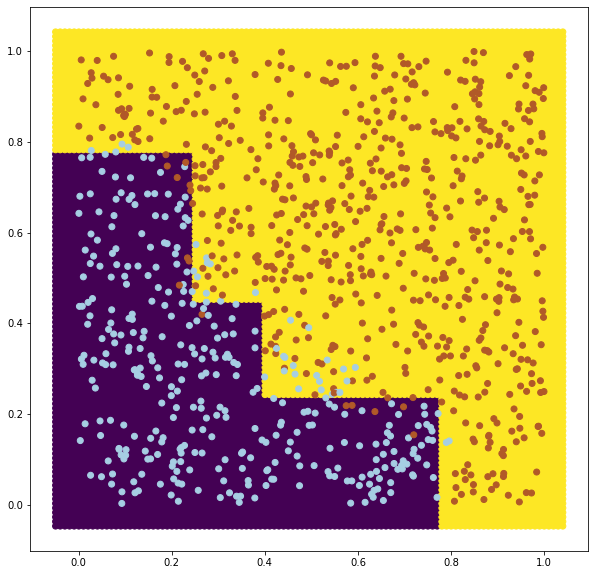

In [74]:
draw(clf_gsdt, X, y, 0.01)

In [80]:
clf_gsdt.best_estimator_.predict_proba(X_test)[:,0] > 0.1

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False,

##### Predecir una probabilidad -> Metric: Receiver Operating Characteristic Curve
Quieres que tu curva roc sea lo más parecida a un triangulo.
* Mide la confianza en si misma que tiene el modelo

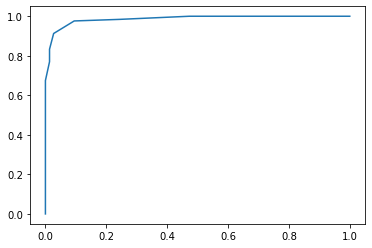

In [82]:
# Load the library
from sklearn.metrics import roc_curve

# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test, clf_gsdt.best_estimator_.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp);

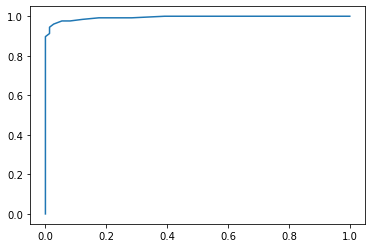

In [84]:
#linear
fp,tp,_ = roc_curve(y_test, clf.best_estimator_.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp);

#### Area debajo de la curva

In [ ]:
from sklearn.metrics import roc_curve, auc


### Pickle
5. Salvar un modelo
Cuando se ha desarrollado un modelo de predicción y se ha entrenado, se puede guardar de modo que pueda ser reutilizable en otra ocasión. Esta tarea se puede lleva a cabo de forma sencilla mediante el módulo pickle.

### Random Forest

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

El algoritmo de Random Forest es una modificación del proceso de bagging que consigue mejorar los resultados gracias a que decorrelaciona aún más los árboles generados en el proceso, en el caso particular de los árboles de decisión, dada su naturaleza de bajo bias y alta varianza, bagging ha demostrado tener muy buenos resultados.

In [85]:
from sklearn.ensemble import RandomForestClassifier




In [91]:
clfr = GridSearchCV(
    RandomForestClassifier(),
    param_grid={"max_depth": np.arange(2,11), 
                "min_samples_leaf": [50, 100, 200]})

# Fit will test all of the combinations
clfr.fit(X, y)

clfr.best_params_

{'max_depth': 9, 'min_samples_leaf': 50}

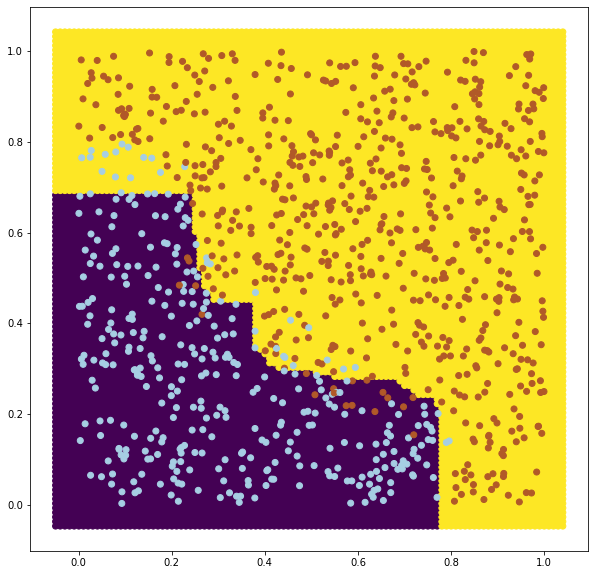

In [92]:
draw(clfr, X, y, 0.01)

In [ ]:
#n_estimator 
clfr = GridSearchCV(
    RandomForestClassifier(),
    param_grid={"max_depth": np.arange(3, 8), 
                "n_estimators": [50, 100, 200]}
)

# Fit will test all of the combinations
clfr.fit(X, y)

clfr.best_params_

#### Gradiente Boosted Trees

Un modelo Gradient Boosting Trees está formado por un conjunto (ensemble) de árboles de decisión individuales, entrenados de forma secuencial. Cada nuevo árbol emplea información del árbol anterior para aprender de sus errores, mejorando iteración a iteración. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.